
"""

Filters the raw base for creating a cleaner "Dataset_base"


"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2022-12-03.csv', parse_dates = True)

print(df.ft_raw.shape)
print(df.ft_raw.columns.values.tolist())

# 588017 records


(588017, 33)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [8]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [9]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


           1      2      5      3      4      6      7      8   3=   4=   2=   5=   1=   6=   7=
Place  81366  81147  81093  81059  81046  75828  61241  42758  482  463  434  391  310  279  120


In [34]:

print( pd.DataFrame(df.ft_raw['position'].value_counts()).transpose() )


              1      2      3      4      5      6      7      8
position  81676  81581  81541  81509  81484  76107  61361  42758


In [10]:

df_base = df.ft_raw.copy()


In [11]:

df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [12]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos
70,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,4.2,8,2,0.39,2
2036,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,8.5,8,3,3.60,3
2292,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,9.1,8,6,8.80,6
3140,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,2.8,8,5,7.59,5
3413,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.1,8,4,5.36,4
8457,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,6.2,8,7,14.94,7
47244,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.5,8,1,0.39,1
87387,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,18.1,8,8,16.19,8


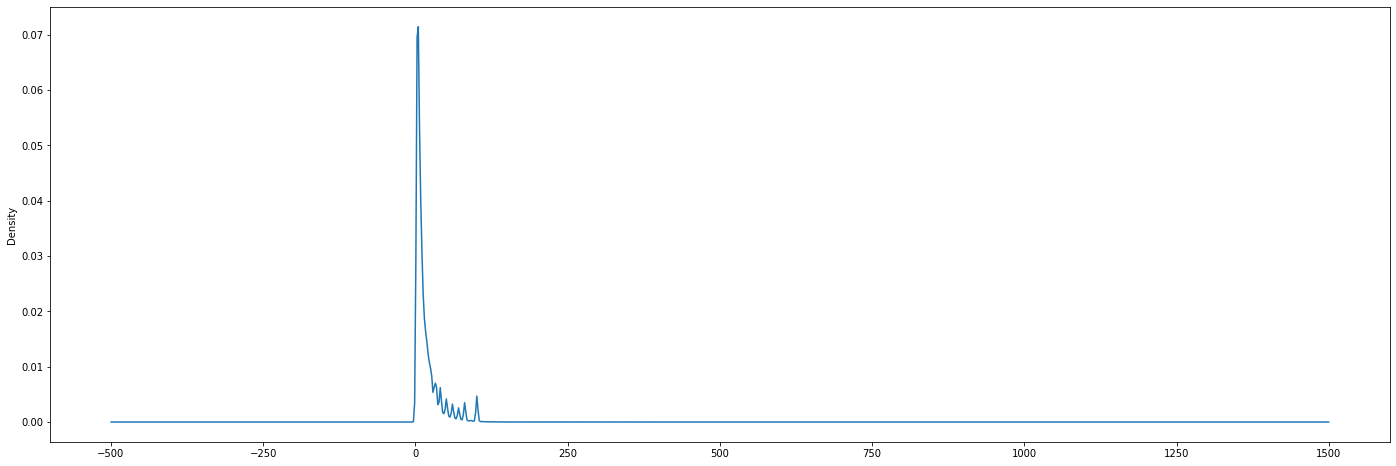

In [13]:

df_base['ft_sp'].plot(kind = 'density', figsize = (24,8))


##### Adding Variables to help with Evaluation

In [14]:

# Top 3 Actuals

##
groupings = ['@id_RACE']

# Actual Result
df_base['Winner_actual'] = df_base.apply(lambda x : 1 if int(x.position) ==1 else 0, axis = 1)
df_base['Top3_actual'] = df_base.apply(lambda x : 1 if int(x.position) <=3 else 0, axis = 1)


In [15]:

# Random Position 
##
groupings = ['@id_RACE']

import random
#print(random.uniform(0, 1))

df_base['rand_mean'] = 0.5
df_base['rand_uniform'] = np.random.normal( df_base['rand_mean'] )

## Rank from the random variables 
df_base["position_random"] = df_base.groupby(groupings)["rand_uniform"].rank("dense", ascending=False)

# Winner / Place Columns
df_base['Winner_random'] = df_base.apply(lambda x : 1 if x.position_random <= 1 else 0, axis = 1)
df_base['Top3_random'] = df_base.apply(lambda x : 1 if x.position_random <= 3 else 0, axis = 1)

print(datetime.now())


2022-12-03 03:48:21.534112


In [16]:

# FastTrack Position

groupings = ['@id_RACE']

## Rank for Place Preds
df_base["position_fasttrack"] = df_base.groupby(groupings)["ft_sp"].rank("dense", ascending=True)

# Winner / Place Columns
df_base['Winner_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 1 else 0, axis = 1)
df_base['Top3_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 3 else 0, axis = 1)

print(datetime.now())


2022-12-03 03:48:31.453129


In [17]:

# Random Benchmark

# Bet on all Preds = s1
df_base['rand_1'] = df_base.apply( lambda x : 1 if x.position_random == 1 else 0, axis = 1 )
df_base['h_rand_1'] = df_base.apply( lambda x : 1 if ( x.rand_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.rand_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_base['p_rand_1'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.rand_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.rand_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )

print()
print(datetime.now())

# Bet on all Place = s2
#df_base['fs_2'] = df_base.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_base["rand_all_plc"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_random <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_random <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)
df_base['h_rand_all_plc'] = df_base.apply( lambda x : 1 if ( x.rand_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.rand_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_base['p_rand_all_plc'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.rand_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.rand_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())


# Laying Last 
df_base["rand_lay_last"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                else 1 if (x.x_num_dogs == x.position_random) \
                                                                   else 0, axis = 1)

df_base['h_rand_lay_last'] = df_base.apply( lambda x : 1 if ( x.rand_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_base['p_rand_lay_last'] = df_base.apply( lambda x : 1 if ( x.rand_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.rand_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())



2022-12-03 03:49:01.490286

2022-12-03 03:49:41.882134

2022-12-03 03:50:11.437603


In [18]:

# FastTrack Benchmark

# Bet on all Preds = s1
df_base['ft_1'] = df_base.apply( lambda x : 1 if x.position_fasttrack == 1 else 0, axis = 1 )
df_base['h_ft_1'] = df_base.apply( lambda x : 1 if ( x.ft_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.ft_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_base['p_ft_1'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.ft_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.ft_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )

print()
print(datetime.now())

# Bet on all Place = s2
df_base["ft_all_plc"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_fasttrack <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_fasttrack <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)
df_base['h_ft_all_plc'] = df_base.apply( lambda x : 1 if ( x.ft_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.ft_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_base['p_ft_all_plc'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.ft_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.ft_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_base["ft_lay_last"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_base['h_ft_lay_last'] = df_base.apply( lambda x : 1 if ( x.ft_lay_last == 1 ) & ( x.position > 1) \
                                             else 0 , axis = 1 )

df_base['p_ft_lay_last'] = df_base.apply( lambda x : 1 if ( x.ft_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.ft_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3Min runtime



2022-12-03 03:50:40.853863

2022-12-03 03:51:20.970299

2022-12-03 03:51:51.168113


In [19]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,5.880170e+05,588017.000000,588017.000000,588016.000000,0.0,588017.000000,506341.000000,588017.000000,489326.000000,588017.000000,404411.000000,5.880170e+05,588017.000000,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,4.477804,4.584839,29.925088,NaN,6.452314,2.061646,0.526102,7.284412,24.391543,426.354001,7.386968e+08,110234.634871,7.386968e+08,6.161113,16.986033,7.341031,4.168502,6.365959,4.168502,0.138901,0.416311,0.5,0.499795,4.170515,0.138637,0.415911,4.030804,0.144025,0.434047,0.138637,0.019404,-0.032898,0.350065,0.048158,-0.083066,0.138637,0.118872,-0.425160,0.144025,0.058374,-0.020107,0.365408,0.100523,-0.059634,0.104463,0.102424,-0.209428
std,1.145309e+08,2.344385,2.432500,3.321114,NaN,8.736779,7.862522,1.582459,2.515969,4.945432,2908.677114,6.357945e+07,77018.376912,6.357945e+07,3.281445,21.050777,0.893514,2.162005,4.765762,2.162005,0.345843,0.492947,0.0,0.999205,2.161872,0.345568,0.492879,2.089922,0.351115,0.495632,0.345568,0.137941,1.233311,0.476990,0.214101,1.922300,0.345568,0.323639,6.309887,0.351115,0.234450,0.428227,0.481545,0.300696,0.962507,0.305860,0.303205,8.257026
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.573843,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-752.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000
25%,4.005005e+08,2.000000,2.000000,27.200000,NaN,2.500000,0.570000,0.000000,5.500000,20.540000,0.000000,6.854128e+08,65398.000000,6.854128e+08,3.000000,4.200000,7.000000,2.000000,2.500000,2.000000,0.000000,0.000000,0.5,-0.174808,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.569441e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.520000,20.000000,7.402821e+08,99417.000000,7.402821e+08,6.000000,8.800000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.499779,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.405822e+08,7.000000,7.000000,32.500000,NaN,9.030000,2.660000,0.000000,8.760000,27.070000,420.000000,7.922435e+08,123529.000000,7.922435e+08,9.000000,20.800000,8.000000,6.000000,9.030000,6.000000,0.000000,1.000000,0.5,1.173603,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.483914e+0

In [20]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  y_runtime  Prizemoney  RaceId  TrainerId  TrainerName  @id_RACE  RaceNum  \
0        0      0        0    0    0       1           0    588017        0    81676  78666       0    284915        98691          0      183606       0          0            0         0        0   

   RaceName  RaceTime  Distance  RaceGrade  ...  rand_uniform  position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  h_rand_1  p_rand_1  \
0        15         0         0          0  ...             0                0              0            0                   0                0              0       0         0         0   

   rand_all_plc  h_rand_all_plc  p_rand_all_plc  rand_lay_last  h_rand_lay_last  p_rand_lay_last  ft_1  h_ft_1  p_ft_1  ft_all_plc  h_ft_all_plc  p_ft_all_plc  ft_lay_last  h_ft_lay_last  \
0             0             

In [21]:

df_base.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3587
Track             58
DogName        26823
dtype: int64

In [22]:
pd.set_option('display.max_rows', 50)

In [23]:

# Some Track based EDA
tracks_unq = df_base.Track.unique().tolist()

print(type(tracks_unq))

tracks_unq.sort()

print(tracks_unq)


<class 'list'>
['Albion Park', 'Angle Park', 'Ballarat', 'Bathurst', 'Bendigo', 'Broken Hill', 'Bulli', 'Bundaberg', 'Cannington', 'Capalaba', 'Casino', 'Coonamble', 'Cranbourne', 'Dapto', 'Darwin', 'Devonport', 'Dubbo', 'Gawler', 'Geelong', 'Gosford', 'Goulburn', 'Grafton', 'Gunnedah', 'Healesville', 'Hobart', 'Horsham', 'Ipswich', 'Kempsey', 'Launceston', 'Lismore', 'Lithgow', 'Maitland', 'Mandurah', 'Meadows', 'Moree', 'Mount Gambier', 'Murray Bridge', 'Muswellbrook', 'Northam', 'Nowra', 'Potts Park', 'Richmond', 'Rockhampton', 'Sale', 'Sandown Park', 'Shepparton', 'Tamworth', 'Taree', 'Temora', 'The Gardens', 'Townsville', 'Traralgon', 'Wagga', 'Warragul', 'Warrnambool', 'Wauchope', 'Wentworth Park', 'Young']


In [24]:

print(datetime.now().date())


2022-12-03


In [25]:

print(df_base.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [26]:

print(df_base.position.value_counts())


1    81676
2    81581
3    81541
4    81509
5    81484
6    76107
7    61361
8    42758
Name: position, dtype: int64


In [27]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' ]

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'dataset_base_{todaydt}.csv'

exp_ds = df_base.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )



In [28]:

print(exp_ds.shape)


(588017, 42)


In [29]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [30]:

exp_ds.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,4,0,0,0.5,1.013172,1.0,1,1,5.0,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1,108390981,DOLLY DOES IT,26.40,629797242,629797242,452m,Grade 5,Devonport,2021-01-12,7.0,7,5,6.00,5,0,0,0.5,1.531921,2.0,0,1,5.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
2,108390981,DOLLY DOES IT,26.20,629797513,629797513,452m,Grade 5,Devonport,2021-01-19,7.0,7,1,5.25,1,1,1,0.5,1.297518,3.0,0,1,4.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
3,108390981,DOLLY DOES IT,26.48,638810808,638810808,452m,Mixed 4/5 Heat,Devonport,2021-02-16,7.0,8,7,10.50,7,0,0,0.5,0.134445,6.0,0,0,4.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
4,108390981,DOLLY DOES IT,26.91,643554706,643554706,452m,Grade 4,Devonport,2021-03-02,91.0,8,8,18.50,8,0,0,0.5,1.046405,5.0,0,0,8.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,1,1.0


In [31]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,5.880170e+05,588017.000000,5.880170e+05,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,24.391543,7.386968e+08,7.386968e+08,16.986033,7.341031,4.168502,6.365959,4.168502,0.138901,0.416311,0.5,0.499795,4.170515,0.138637,0.415911,4.030804,0.144025,0.434047,0.138637,0.019404,-0.032898,0.350065,0.048158,-0.083066,0.138637,0.118872,-0.425160,0.144025,0.058374,-0.020107,0.365408,0.100523,-0.059634,0.104463,0.102424,-0.209428
std,1.145309e+08,4.945432,6.357945e+07,6.357945e+07,21.050777,0.893514,2.162005,4.765762,2.162005,0.345843,0.492947,0.0,0.999205,2.161872,0.345568,0.492879,2.089922,0.351115,0.495632,0.345568,0.137941,1.233311,0.476990,0.214101,1.922300,0.345568,0.323639,6.309887,0.351115,0.234450,0.428227,0.481545,0.300696,0.962507,0.305860,0.303205,8.257026
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.573843,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-752.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000
25%,4.005005e+08,20.540000,6.854128e+08,6.854128e+08,4.200000,7.000000,2.000000,2.500000,2.000000,0.000000,0.000000,0.5,-0.174808,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.569441e+08,23.520000,7.402821e+08,7.402821e+08,8.800000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.499779,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.405822e+08,27.070000,7.922435e+08,7.922435e+08,20.800000,8.000000,6.000000,9.030000,6.000000,0.000000,1.000000,0.5,1.173603,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,396.120000,8.483914e+08,8.483914e+08,999.990000,8.000000,8.000000,27.000000,8.000000,1.000000,1.000000,0.5,4.988097,8.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.500000,1.000000,1.000000,33.140000,1.000000,1.000000,1.000000


In [32]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [33]:

print(datetime.now())
print()
print('THE END')


2022-12-03 03:56:29.344627

THE END
